In [1]:
# Import
import json
import pandas as pd

In [2]:
# Open data
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

print(df.head())



         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [3]:
df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

In [4]:
df.describe()

,firstKeyword,secondKeyword,thirdKeyword,fourthKeyword,thematicFocusCategory,cleanFocusCategory
count,168465,164878,159638,145449,79913,79913
unique,32719,40366,44722,44041,46,46
top,Germany,Germany,Germany,Germany,{'name': 'Politics'},Politics
freq,4010,2107,1584,1291,24923,24923


In [5]:
df_clean = df.copy()
df_clean = df_clean.dropna()
df_clean.describe()

,firstKeyword,secondKeyword,thirdKeyword,fourthKeyword,thematicFocusCategory,cleanFocusCategory
count,68032,68032,68032,68032,68032,68032
unique,13389,17743,19796,20652,46,46
top,Germany,Germany,Germany,Germany,{'name': 'Politics'},Politics
freq,2422,1060,821,743,21983,21983


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_clean['firstKeyword']).toarray()
labels = df_clean['cleanFocusCategory']
features.shape
features.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

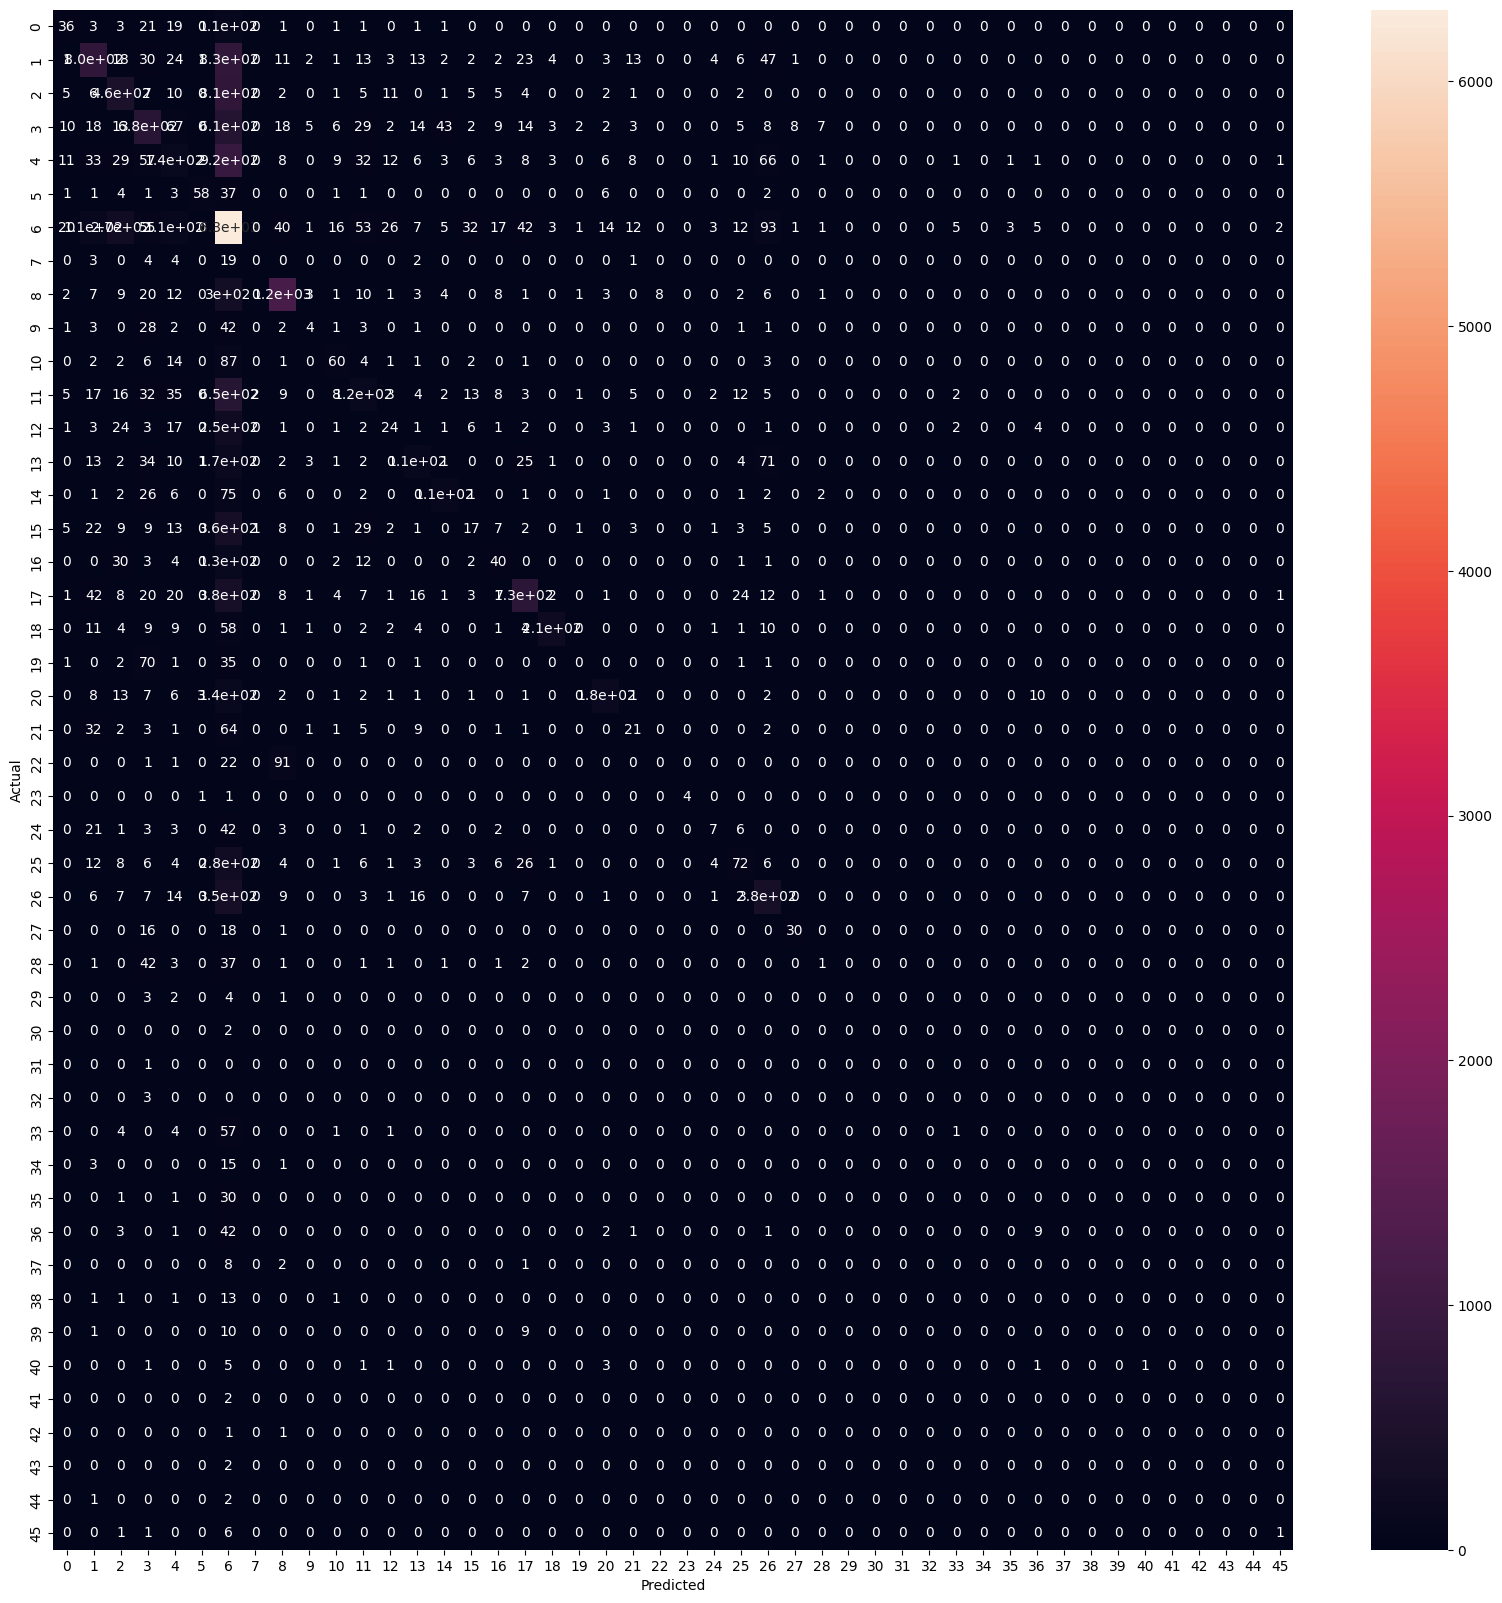

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred, labels = labels.unique().tolist())
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=True, yticklabels=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

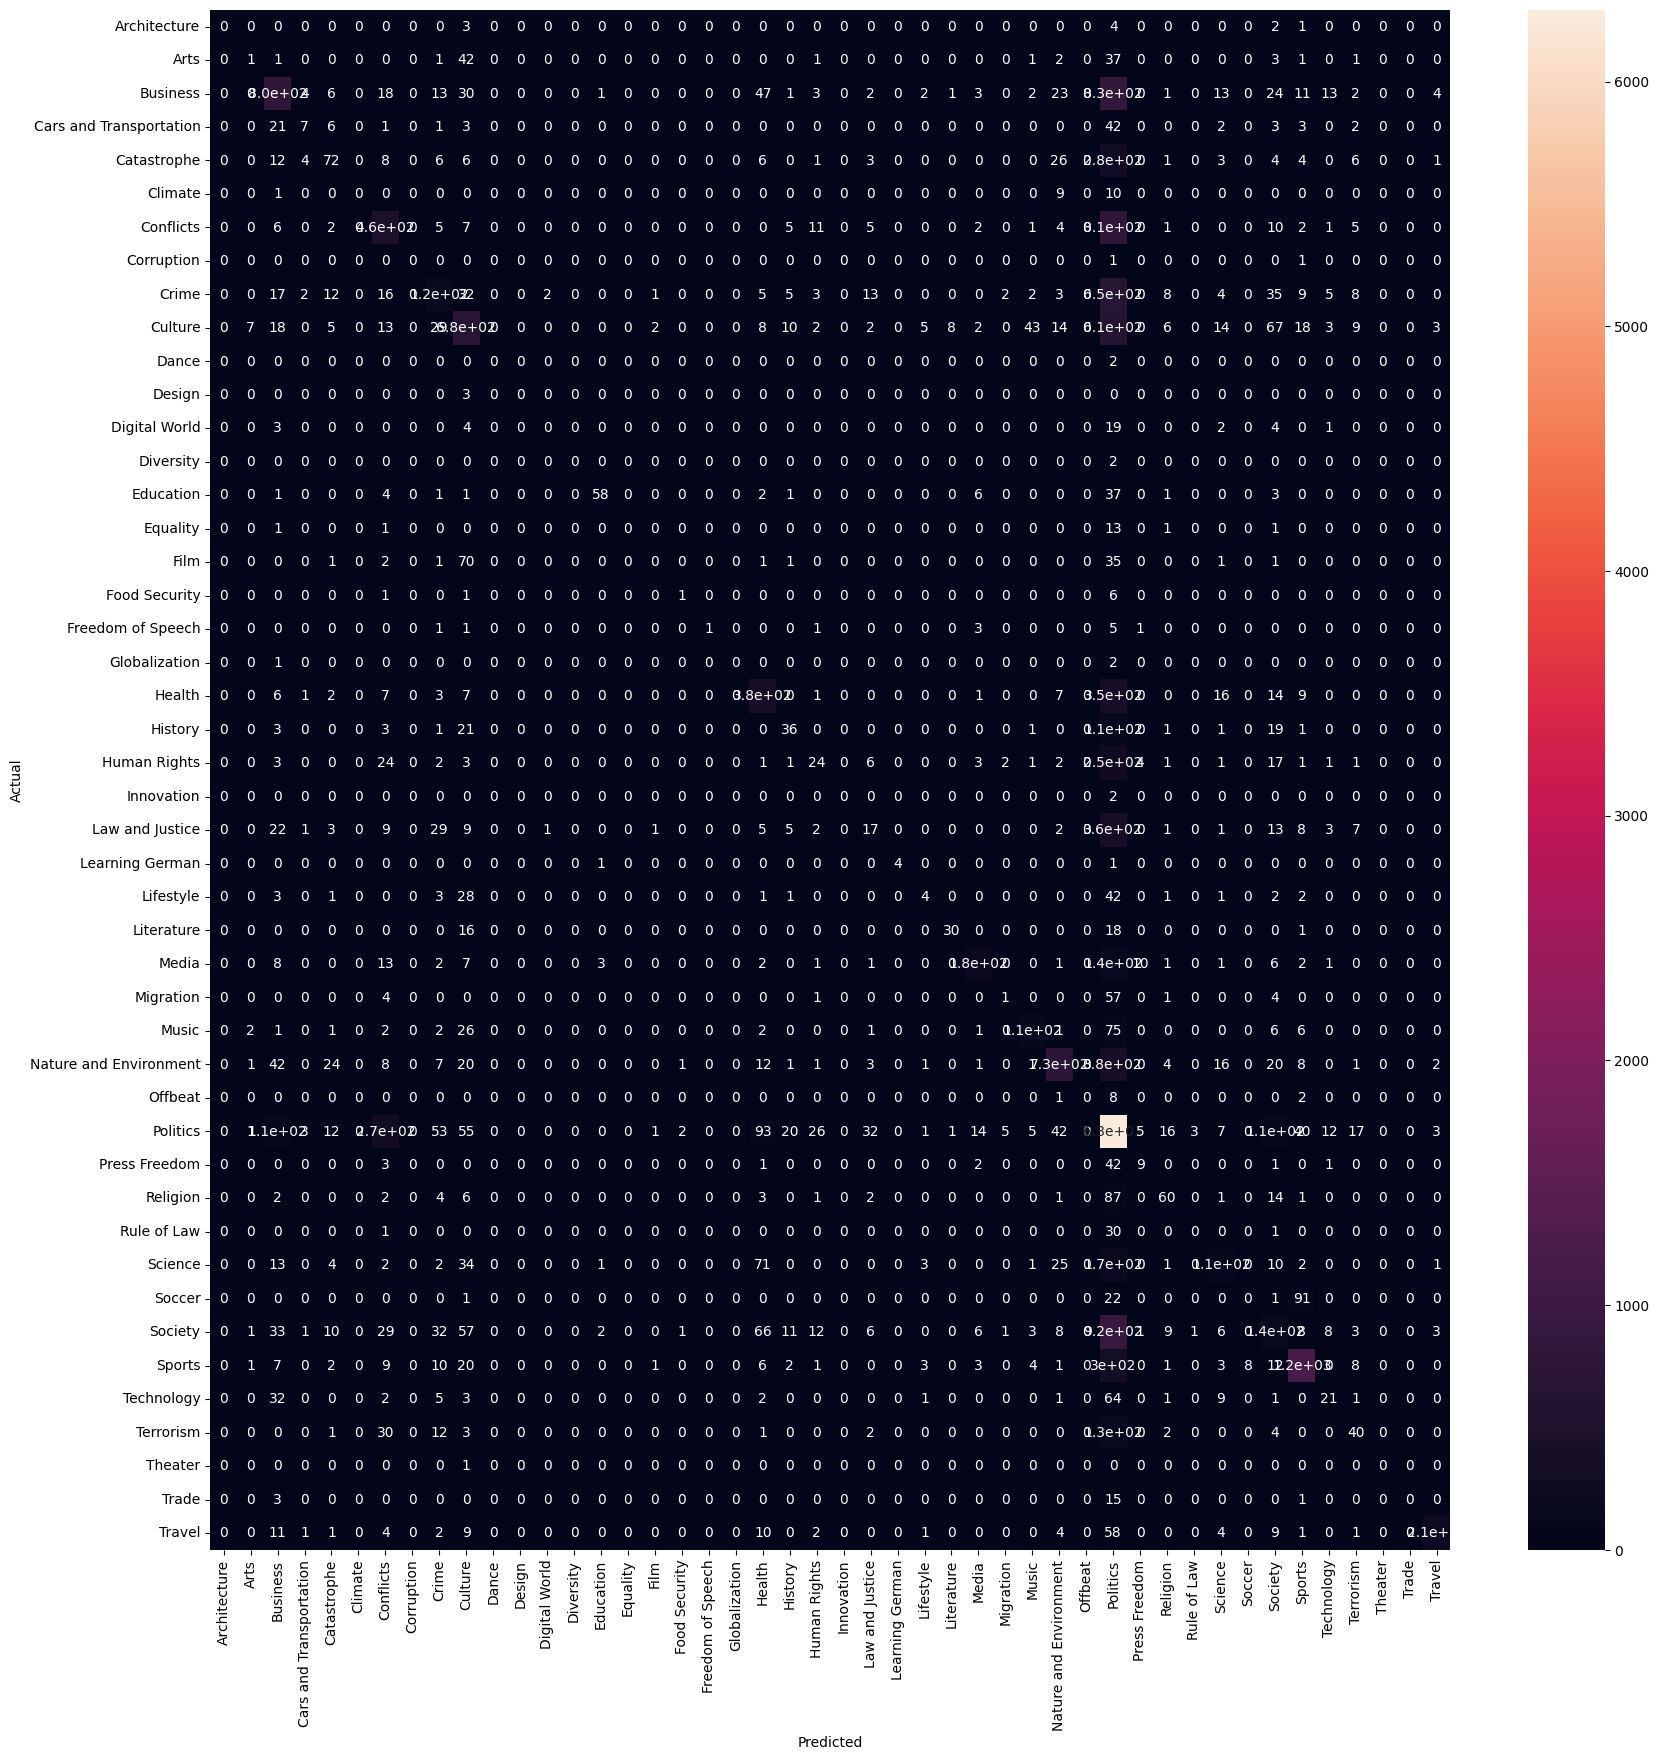

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, xticklabels=category_id_df.values, yticklabels=category_id_df.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5253663533918311

In [84]:
labels.unique().tolist()

['History',
 'Business',
 'Conflicts',
 'Culture',
 'Society',
 'Education',
 'Politics',
 'Digital World',
 'Sports',
 'Lifestyle',
 'Religion',
 'Crime',
 'Human Rights',
 'Science',
 'Music',
 'Law and Justice',
 'Terrorism',
 'Nature and Environment',
 'Travel',
 'Film',
 'Media',
 'Technology',
 'Soccer',
 'Learning German',
 'Cars and Transportation',
 'Catastrophe',
 'Health',
 'Literature',
 'Arts',
 'Architecture',
 'Dance',
 'Theater',
 'Design',
 'Migration',
 'Trade',
 'Rule of Law',
 'Press Freedom',
 'Offbeat',
 'Equality',
 'Climate',
 'Freedom of Speech',
 'Diversity',
 'Corruption',
 'Innovation',
 'Globalization',
 'Food Security']

In [85]:
pd.DataFrame(conf_mat, index=labels.unique().tolist(), columns=labels.unique().tolist())

,History,Business,Conflicts,Culture,Society,Education,Politics,Digital World,Sports,Lifestyle,...,Press Freedom,Offbeat,Equality,Climate,Freedom of Speech,Diversity,Corruption,Innovation,Globalization,Food Security
History,0,0,0,0,0,0,0,0,0,3,...,0,0,0,2,1,0,0,0,0,0
Business,0,1,1,0,0,0,0,0,1,42,...,0,0,0,3,1,0,1,0,0,0
Conflicts,0,0,805,4,6,0,18,0,13,30,...,0,13,0,24,11,13,2,0,0,4
Culture,0,0,21,7,6,0,1,0,1,3,...,0,2,0,3,3,0,2,0,0,0
Society,0,0,12,4,72,0,8,0,6,6,...,0,3,0,4,4,0,6,0,0,1
Education,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Politics,0,0,6,0,2,0,457,0,5,7,...,0,0,0,10,2,1,5,0,0,0
Digital World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Sports,0,0,17,2,12,0,16,0,124,32,...,0,4,0,35,9,5,8,0,0,0
Lifestyle,0,7,18,0,5,0,13,0,29,680,...,0,14,0,67,18,3,9,0,0,3


In [86]:
print(len(y_pred))

22451


In [87]:
# Playground Magda